In [1]:
!pip install -q mysql-connector-python matplotlib pandas seaborn numpy sqlalchemy


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine

In [ ]:
conn = mysql.connector.connect(
    host="{dbhost}",
    user="{dbuser}",
    password="{dbpassword}",
    database="social_network"
)

In [ ]:
# Create SQLAlchemy engine (update the connection string with your correct credentials)
engine = create_engine('mysql+pymysql://{user}:{password}@{host}:{port}/{database}')

# Function to execute a query and return a DataFrame
def execute_query(query):
    return pd.read_sql(query, engine)

# Set the style for seaborn
sns.set(style="whitegrid")

C:\Users\hotru\AppData\Local\Temp\ipykernel_2036\2127187499.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_engagement', y='username', data=top_users, palette='viridis')


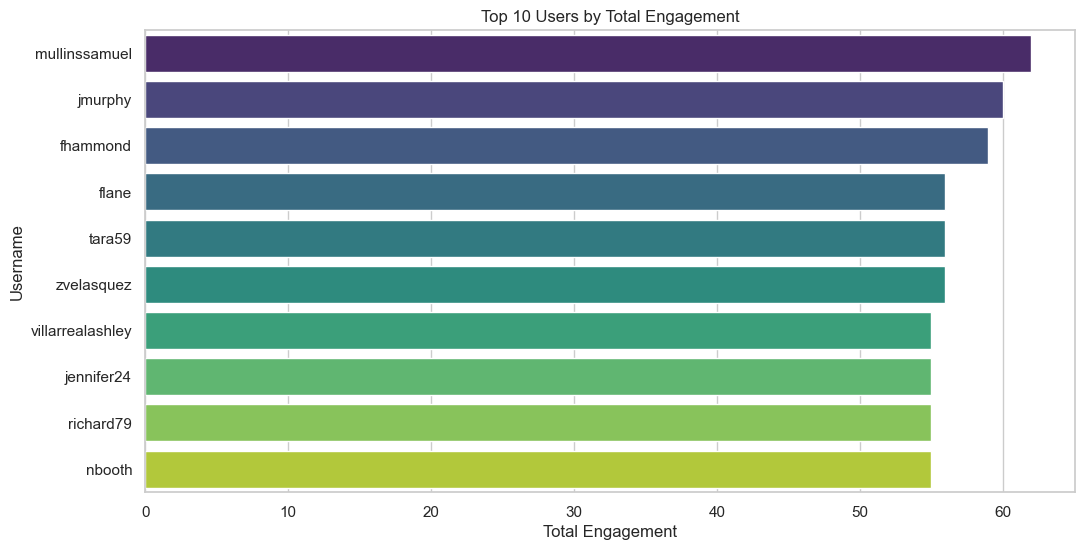

In [5]:
# 1. Top 10 users with the highest number of posts, comments, and reactions combined
QUERY1 = """
SELECT u.user_id, u.username, 
       COUNT(DISTINCT p.post_id) AS post_count,
       COUNT(DISTINCT c.comment_id) AS comment_count,
       COUNT(DISTINCT pr.post_react_id) AS reaction_count,
       (COUNT(DISTINCT p.post_id) + COUNT(DISTINCT c.comment_id) + COUNT(DISTINCT pr.post_react_id)) AS total_engagement
FROM USER u
LEFT JOIN POST p ON u.user_id = p.user_id
LEFT JOIN COMMENT c ON u.user_id = c.user_id
LEFT JOIN POST_REACTION pr ON u.user_id = pr.user_id
GROUP BY u.user_id
ORDER BY total_engagement DESC
LIMIT 10;
"""
top_users = execute_query(QUERY1)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_engagement', y='username', data=top_users, palette='viridis')
plt.title('Top 10 Users by Total Engagement')
plt.xlabel('Total Engagement')
plt.ylabel('Username')
plt.show()

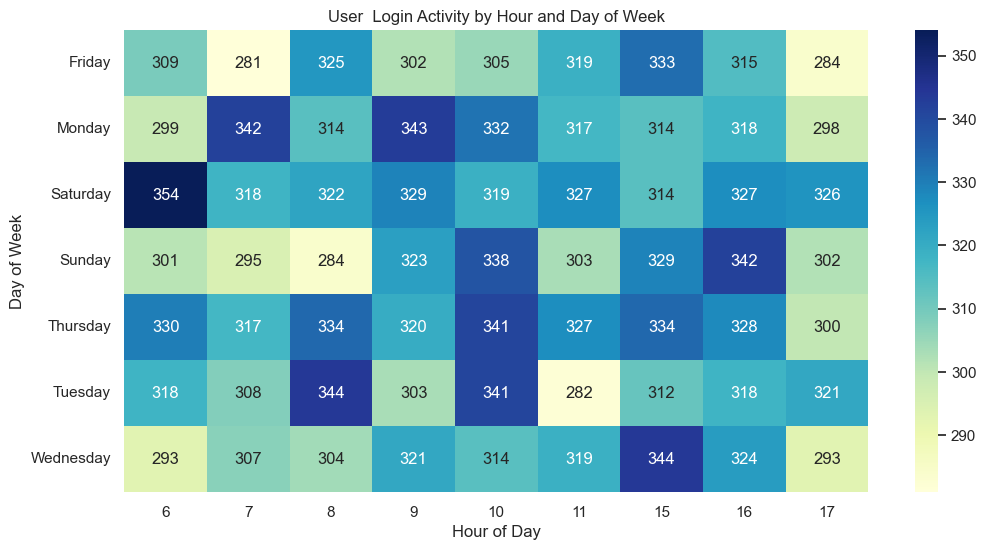

In [6]:
# 2. Most active hours for user logins
QUERY2 = """
SELECT HOUR(login_at) AS login_hour, 
       DAYOFWEEK(login_at) AS day_of_week, 
       COUNT(*) AS login_count
FROM LOGIN
GROUP BY login_hour, day_of_week
ORDER BY login_count DESC;
"""
login_activity = execute_query(QUERY2)

# Create a mapping for day of the week
day_mapping = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
login_activity['day_of_week'] = login_activity['day_of_week'].map(day_mapping)

# Create the heatmap
plt.figure(figsize=(12, 6))
login_pivot = login_activity.pivot(index="day_of_week", columns="login_hour", values="login_count")
sns.heatmap(login_pivot, cmap="YlGnBu", annot=True, fmt="d")
plt.title('User  Login Activity by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

C:\Users\hotru\AppData\Local\Temp\ipykernel_2036\1061160263.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='post_count', y='post_category', data=post_categories, palette='magma')


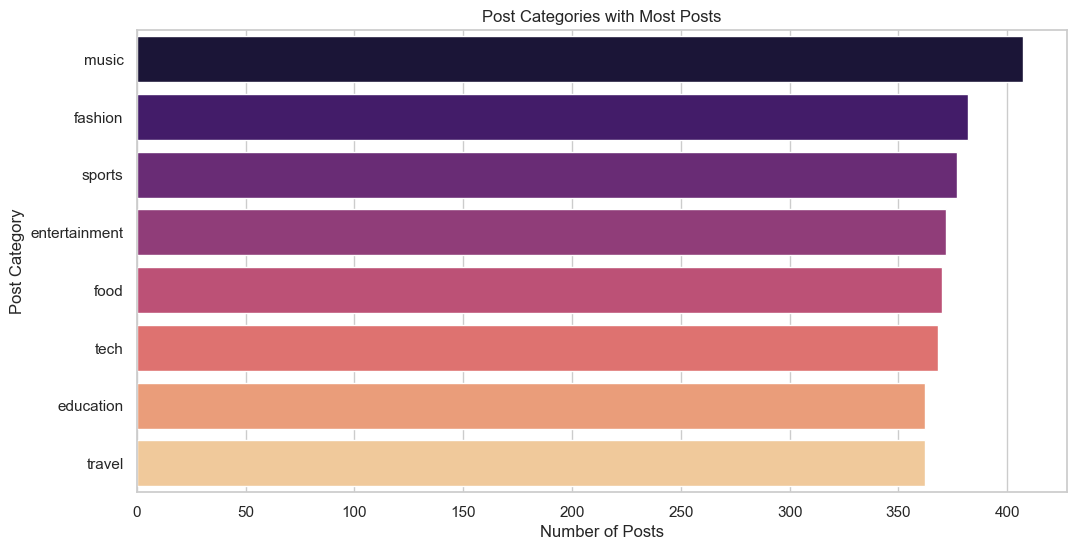

In [7]:
# 3. Post categories with the most posts
QUERY3 = """
SELECT post_category, COUNT(*) AS post_count
FROM POST
GROUP BY post_category
ORDER BY post_count DESC;
"""
post_categories = execute_query(QUERY3)

plt.figure(figsize=(12, 6))
sns.barplot(x='post_count', y='post_category', data=post_categories, palette='magma')
plt.title('Post Categories with Most Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Post Category')
plt.show()

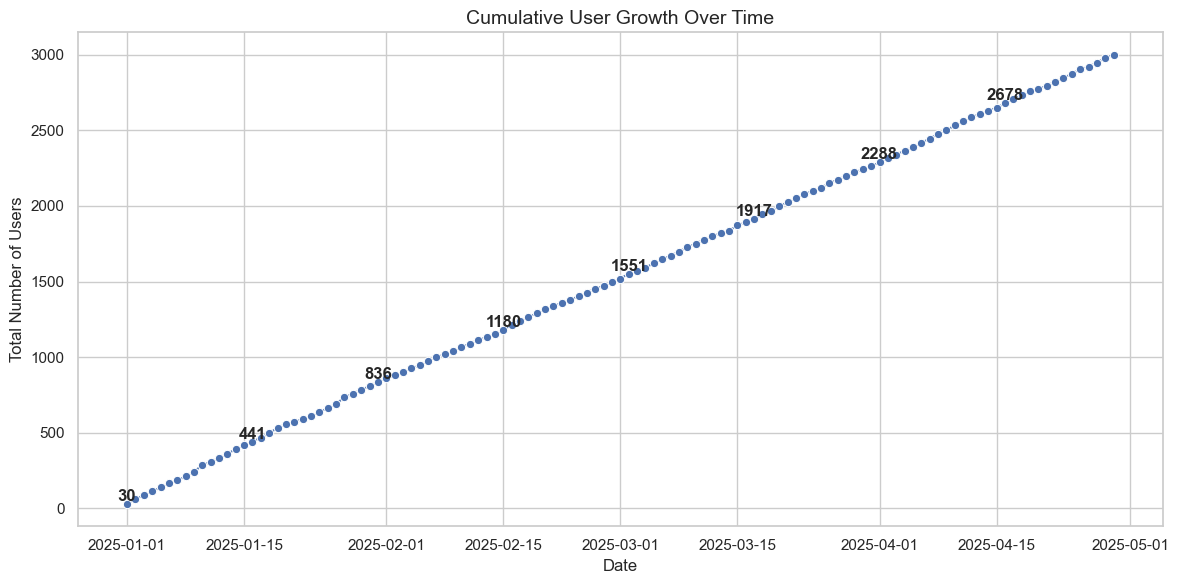

In [13]:
# 4. User growth by day
QUERY4 = """
SELECT DATE(created_at) AS day, COUNT(*) AS daily_users
FROM USER
GROUP BY day
ORDER BY day;
"""

# Execute the query and get the user growth data
user_growth = execute_query(QUERY4)

# Convert the 'day' column to datetime for better handling
user_growth['day'] = pd.to_datetime(user_growth['day'])
user_growth['cumulative_users'] = user_growth['daily_users'].cumsum()

# Set the figure size for the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='cumulative_users', data=user_growth, marker='o')

# Title and labels
plt.title('Cumulative User Growth Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Number of Users')

# Annotate the plot at every half-month (approximately every 15 days)
for i in range(0, len(user_growth), 15):  # Start from index 0 and step by 15
    plt.text(user_growth['day'].iloc[i], user_growth['cumulative_users'].iloc[i],
             str(user_growth['cumulative_users'].iloc[i]), 
             horizontalalignment='center', verticalalignment='bottom', 
             fontsize=12, weight='bold')  # Increased font size and bold text

plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hotru\AppData\Local\Temp\ipykernel_2036\3566244364.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reaction_count', y='caption', data=top_posts, palette='coolwarm')


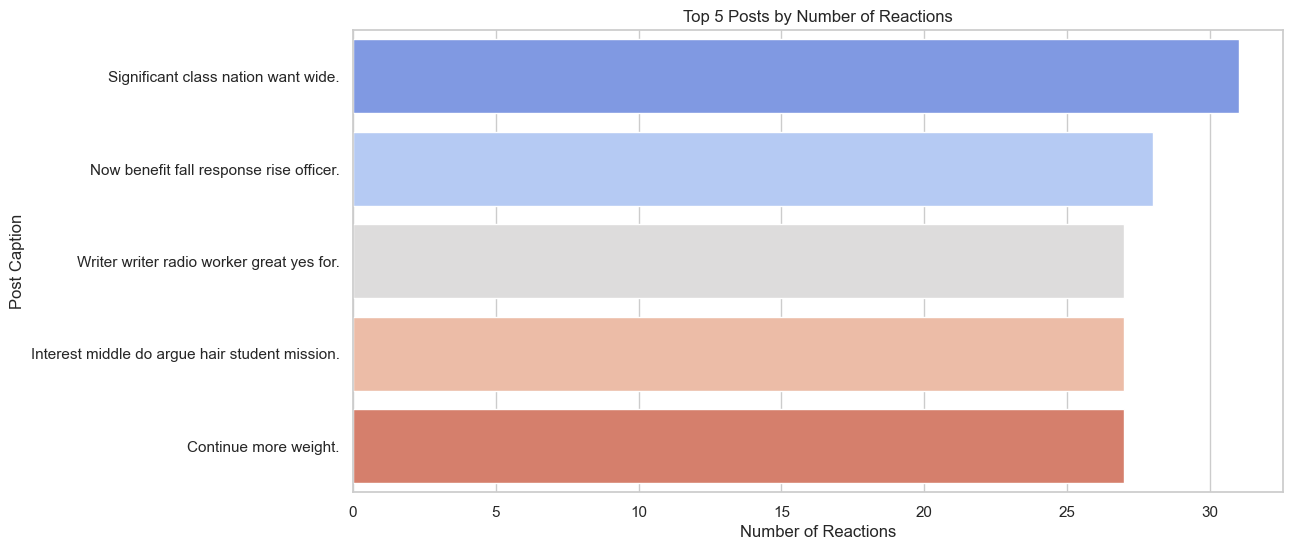

In [ ]:
# 5. Top 5 posts with the most reactions
QUERY5 = """
SELECT p.post_id, p.caption, COUNT(pr.post_react_id) AS reaction_count
FROM POST p
LEFT JOIN POST_REACTION pr ON p.post_id = pr.post_id
GROUP BY p.post_id
ORDER BY reaction_count DESC
LIMIT 5;
"""
top_posts = execute_query(QUERY5)

plt.figure(figsize=(12, 6))
sns.barplot(x='reaction_count', y='caption', data=top_posts, palette='coolwarm')
plt.title('Top 5 Posts by Number of Reactions')
plt.xlabel('Number of Reactions')
plt.ylabel('Post Caption')
plt.show()

C:\Users\hotru\AppData\Local\Temp\ipykernel_2036\2874131213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_posts', y='location', data=top_locations, palette='viridis')


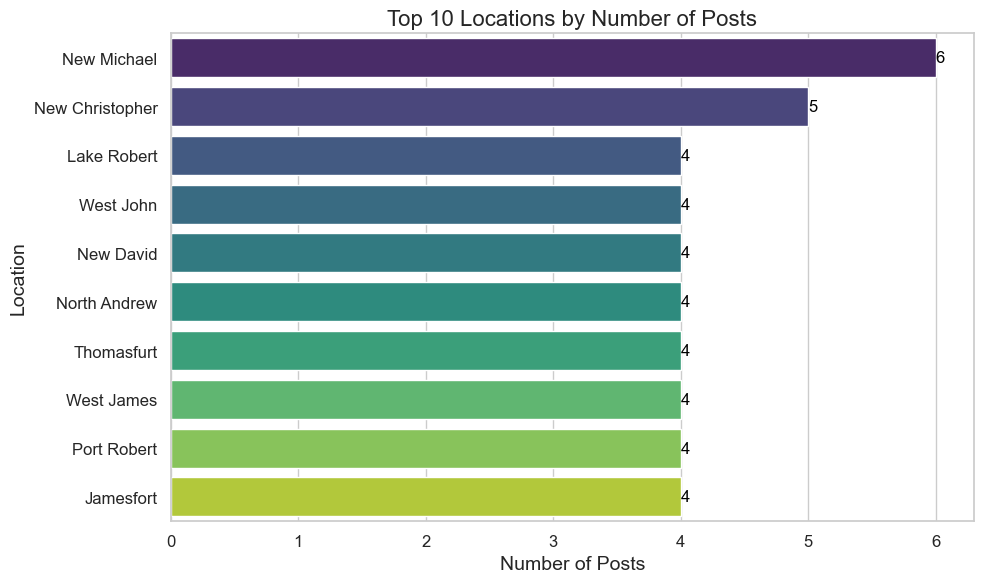

In [10]:
# 6. Posts by location
QUERY6 = """
SELECT p.location, 
       COUNT(p.post_id) AS num_posts
FROM POST p
GROUP BY p.location
ORDER BY num_posts DESC
LIMIT 10;  -- Get only the top 10 locations
"""
top_locations = execute_query(QUERY6)

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot for the top 10 locations
sns.barplot(x='num_posts', y='location', data=top_locations, palette='viridis')

# Add data labels to the bars
for index, value in enumerate(top_locations['num_posts']):
    plt.text(value, index, str(value), color='black', va='center')

# Set the title and labels
plt.title('Top 10 Locations by Number of Posts', fontsize=16)
plt.xlabel('Number of Posts', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

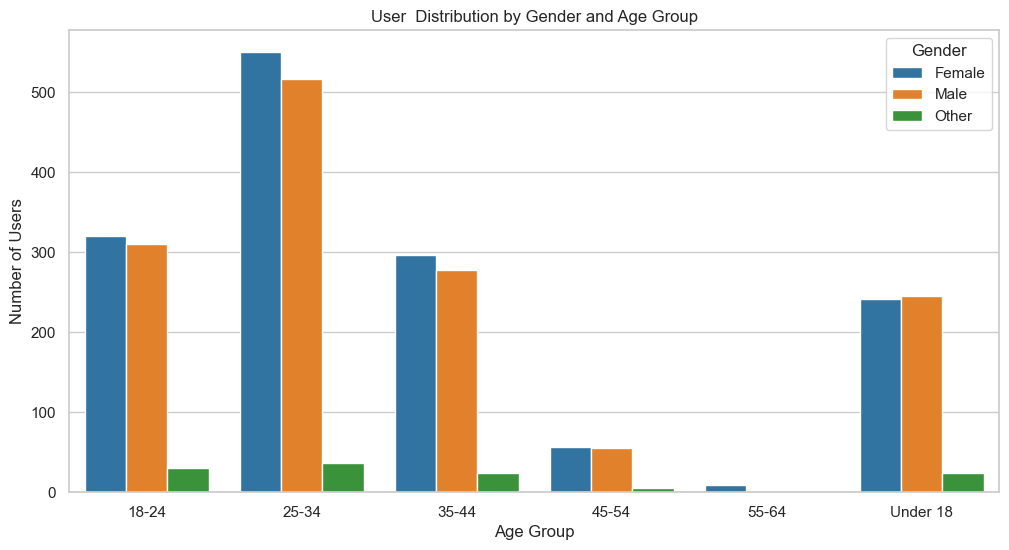

In [14]:
# 7. Distribution of users by gender and age group
QUERY7 = """
SELECT gender, 
       CASE 
           WHEN age < 18 THEN 'Under 18'
           WHEN age BETWEEN 18 AND 24 THEN '18-24'
           WHEN age BETWEEN 25 AND 34 THEN '25-34'
           WHEN age BETWEEN 35 AND 44 THEN '35-44'
           WHEN age BETWEEN 45 AND 54 THEN '45-54'
           WHEN age BETWEEN 55 AND 64 THEN '55-64'
           ELSE '65 and above'
       END AS age_group,
       COUNT(*) AS user_count
FROM USER
GROUP BY gender, age_group
ORDER BY gender, age_group;
"""
user_distribution = execute_query(QUERY7)

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='user_count', hue='gender', data=user_distribution, palette='tab10')
plt.title('User  Distribution by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.legend(title='Gender')
plt.show()

C:\Users\hotru\AppData\Local\Temp\ipykernel_2036\699794370.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='follower_count', y='username', data=top_followers, palette='tab10')


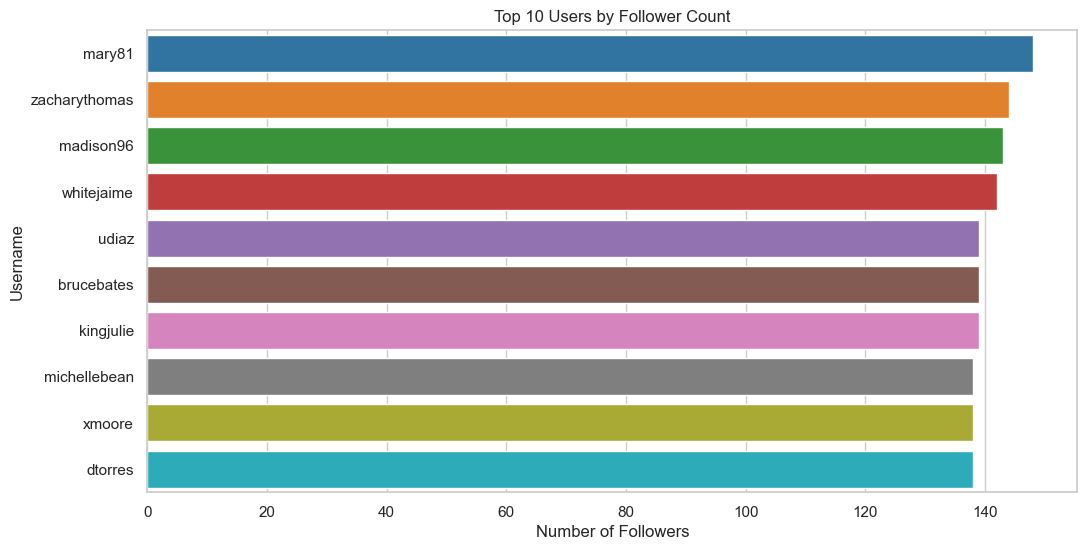

In [16]:
# 8. Top 10 users with the most followers
QUERY8 = """
SELECT u.user_id, u.username, COUNT(f.follower_id) AS follower_count
FROM USER u
LEFT JOIN FOLLOW f ON u.user_id = f.followee_id
GROUP BY u.user_id
ORDER BY follower_count DESC
LIMIT 10;
"""
top_followers = execute_query(QUERY8)

plt.figure(figsize=(12, 6))
sns.barplot(x='follower_count', y='username', data=top_followers, palette='tab10')
plt.title('Top 10 Users by Follower Count')
plt.xlabel('Number of Followers')
plt.ylabel('Username')
plt.show()


C:\Users\hotru\AppData\Local\Temp\ipykernel_2036\1725822009.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='usage_count', y='hashtag_name', data=common_hashtags, palette='tab10')


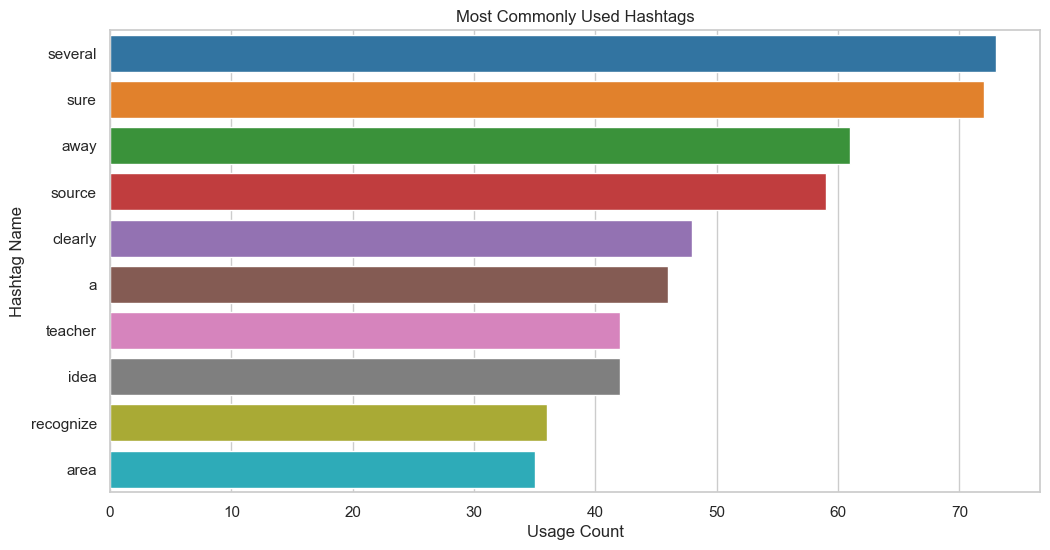

In [17]:
# 9. Most commonly used hashtags
QUERY9 = """
SELECT hashtag_name, COUNT(*) AS usage_count
FROM HASHTAG
GROUP BY hashtag_name
ORDER BY usage_count DESC
LIMIT 10;
"""
common_hashtags = execute_query(QUERY9)

plt.figure(figsize=(12, 6))
sns.barplot(x='usage_count', y='hashtag_name', data=common_hashtags, palette='tab10')
plt.title('Most Commonly Used Hashtags')
plt.xlabel('Usage Count')
plt.ylabel('Hashtag Name')
plt.show()

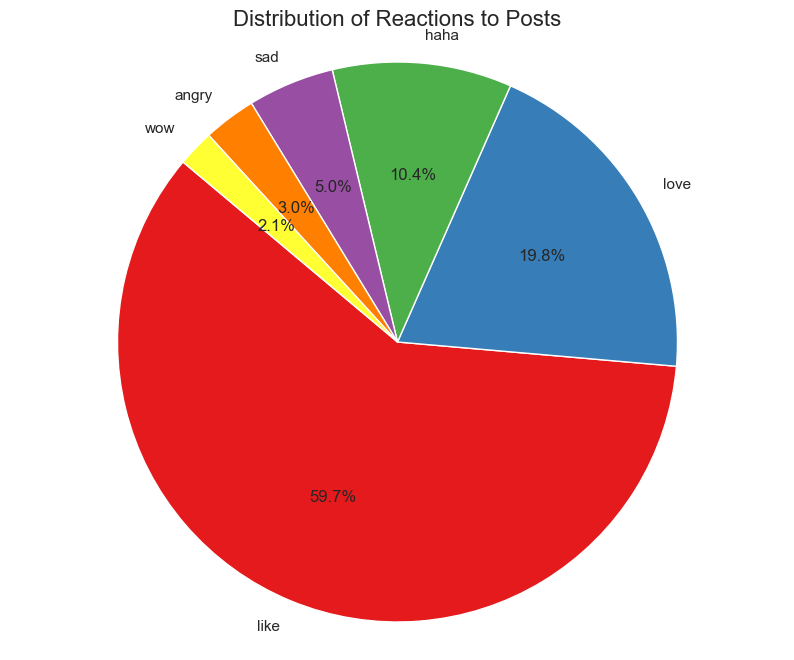

In [19]:
# 10. Distribution of different types of reactions to posts
QUERY10 = """
SELECT e.emotion_name, COUNT(pr.post_react_id) AS reaction_count
FROM POST_REACTION pr
JOIN EMOTION e ON pr.emotion_id = e.emotion_id
GROUP BY e.emotion_name
ORDER BY reaction_count DESC;
"""
reaction_distribution = execute_query(QUERY10)

# Set up the pie chart
plt.figure(figsize=(10, 8))
plt.pie(reaction_distribution['reaction_count'], 
        labels=reaction_distribution['emotion_name'], 
        autopct='%1.1f%%',  # Display percentage
        startangle=140,     # Start angle for the pie chart
        colors=sns.color_palette('Set1', len(reaction_distribution)))  # Color palette

# Set the title
plt.title('Distribution of Reactions to Posts', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()